In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Science_Fundamentals/DSF_Project'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data_Science_Fundamentals/DSF_Project


In [ ]:
%cd '/content/gdrive/MyDrive/Data_Science_Fundamentals/DSF_Project'

/content/gdrive/MyDrive/Data_Science_Fundamentals/DSF_Project


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
delay_with_weather = pd.read_csv('Delay_With_Weather_2018-2019.csv')
delay_with_weather

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED,TMAX,TMIN,PRCP,SNOW,SNWD,AWND,WT01,WT08,WT02,WT04,WT09,WT03,WT06,WT05,WT07,WT10,TMAX_Dest,TMIN_Dest,PRCP_Dest,SNOW_Dest,SNWD_Dest,AWND_Dest,WT01_Dest,WT08_Dest,WT02_Dest,WT04_Dest,WT09_Dest,WT03_Dest,WT06_Dest,WT05_Dest,WT07_Dest,WT10_Dest
0,1,14,9E,N315PQ,3469,11433,DTW,Michigan,14100,1410005,PHL,Pennsylvania,845,840.0,0.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,1000-1059,0.0,0.0,-66.0,-132.0,0.0,0.0,30.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,-99.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,Maryland,11433,1143302,DTW,Michigan,1945,1957.0,12.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,2100-2159,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,Michigan,10821,1082106,BWI,Maryland,1730,1725.0,0.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,1900-1959,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1915.0,0.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,2100-2159,0.0,0.0,-71.0,-155.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,-105.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1921.0,0.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,2000-2059,0.0,0.0,-16.0,-88.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.0,-110.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713645,12,31,B6,N703JB,832,12953,LGA,New York,10721,1072102,BOS,Massachusetts,1329,1321.0,0.0,1300-1359,15.0,1336.0,1411.0,5.0,1442,1416.0,0.0,1400-1459,0.0,0.0,78.0,33.0,3.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,28.0,69.0,0.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713646,12,31,B6,N985JT,833,10721,BOS,Massachusetts,14771,1477104,SFO,California,1805,1802.0,0.0,1800-1859,20.0,1822.0,2101.0,5.0,2213,2106.0,0.0,2200-2259,0.0,0.0,67.0,28.0,69.0,0.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,50.0,0.0,0.0,0.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713647,12,31,B6,N990JL,834,14771,SFO,California,10721,1072102,BOS,Massachusetts,2050,2050.0,0.0,2000-2059,15.0,2105.0,514.0,3.0,517,517.0,0.0,0001-0559,0.0,0.0,139.0,50.0,0.0,0.0,0.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,28.0,69.0,0.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4713648,12,31,B6,N304JB,854,11278,DCA,Virginia,10721,1072102,BOS,Massachusetts,1420,1414.0,0.0,1400-1459,15.0,1429.0,1526.0,7.0,1550,1533.0,0.0,1500-1559,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,28.0,69.0,0.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weather_analysis = delay_with_weather[delay_with_weather['MONTH'] < 13]

In [ ]:
snow_analysis_1 = weather_analysis[weather_analysis['SNOW'] > 0]
snow_analysis_1 = snow_analysis_1.groupby('SNOW')['DEP_DELAY_NEW'].mean().reset_index()
snow_analysis_2 = weather_analysis[weather_analysis['SNOW_Dest'] > 0]
snow_analysis_2 = snow_analysis_2.groupby('SNOW_Dest')['ARR_DELAY_NEW'].mean().reset_index()

In [ ]:
wind_analysis_1 = weather_analysis.groupby('AWND')['DEP_DELAY_NEW'].mean().reset_index()
wind_analysis_2 = weather_analysis.groupby('AWND_Dest')['ARR_DELAY_NEW'].mean().reset_index()

In [ ]:
visualization1_1 = weather_analysis.groupby('WT01')['DEP_DELAY_NEW'].mean().reset_index()
visualization1_2 = weather_analysis.groupby('WT01_Dest')['ARR_DELAY_NEW'].mean().reset_index()
visualization3_1 = weather_analysis.groupby('WT03')['DEP_DELAY_NEW'].mean().reset_index()
visualization3_2 = weather_analysis.groupby('WT03_Dest')['ARR_DELAY_NEW'].mean().reset_index()
visualization8_1 = weather_analysis.groupby('WT08')['DEP_DELAY_NEW'].mean().reset_index()
visualization8_2 = weather_analysis.groupby('WT08_Dest')['ARR_DELAY_NEW'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


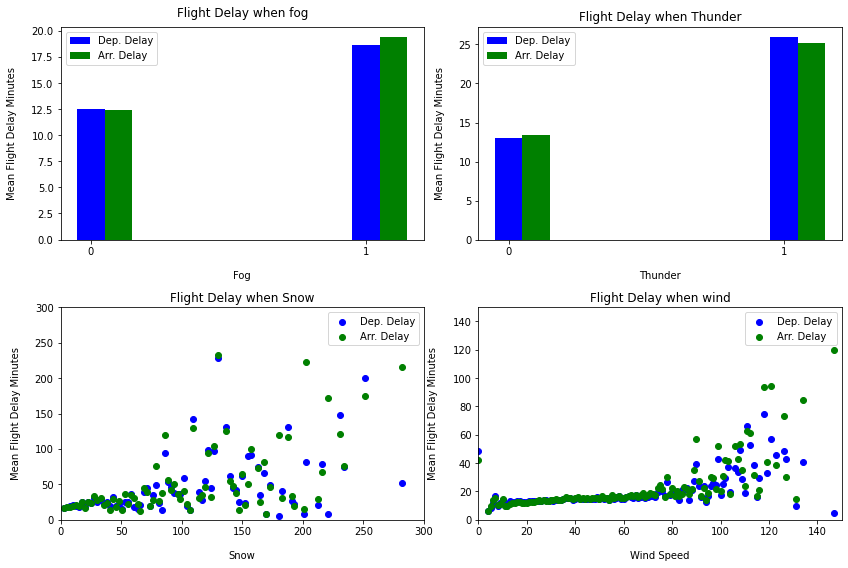

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0,0].set_xlabel("Fog", labelpad=14)
axs[0,0].set_ylabel("Mean Flight Delay Minutes", labelpad=14)
axs[0,0].set_title("Flight Delay when fog", y=1.02);
axs[0,0].bar(visualization1_1["WT01"], visualization1_1['DEP_DELAY_NEW'], color = 'blue', width = 0.1)
axs[0,0].bar(visualization1_2["WT01_Dest"] + 0.1, visualization1_2['ARR_DELAY_NEW'], color = 'green', width = 0.1)
axs[0,0].set_xticks(np.arange(0, 2, 1.0))
axs[0,0].set_xticks([0,1], ['No Fog', 'Fog'])
axs[0,0].legend(['Dep. Delay', 'Arr. Delay'])
fig.tight_layout()
axs[0,1].set_xlabel("Thunder", labelpad=14)
axs[0,1].set_ylabel("Mean Flight Delay Minutes", labelpad=14)
axs[0,1].set_title("Flight Delay when Thunder", y=1.02);
axs[0,1].bar(visualization3_1["WT03"], visualization3_1['DEP_DELAY_NEW'], color = 'blue', width = 0.1)
axs[0,1].bar(visualization3_2["WT03_Dest"] + 0.1, visualization3_2['ARR_DELAY_NEW'], color = 'green', width = 0.1)
axs[0,1].set_xticks(np.arange(0, 2, 1.0))
axs[0,1].set_xticks([0,1], ['No Thunder', 'Thunder'])
axs[0,1].legend(['Dep. Delay', 'Arr. Delay'])
fig.tight_layout()
axs[1,0].set_xlabel("Snow", labelpad=14)
axs[1,0].set_ylabel("Mean Flight Delay Minutes", labelpad=14)
axs[1,0].set_title("Flight Delay when Snow", y=1.02);
axs[1,0].scatter(data=snow_analysis_1, x="SNOW", y= "DEP_DELAY_NEW", color='blue')
axs[1,0].scatter(data=snow_analysis_2, x="SNOW_Dest", y= "ARR_DELAY_NEW", color='green')
axs[1,0].set_xlim(0,300)
axs[1,0].set_ylim(0,300)
axs[1,0].legend(['Dep. Delay', 'Arr. Delay'])
fig.tight_layout()
axs[1,1].set_xlabel("Wind Speed", labelpad=14)
axs[1,1].set_ylabel("Mean Flight Delay Minutes", labelpad=14)
axs[1,1].set_title("Flight Delay when wind", y=1.02);
axs[1,1].scatter(data=wind_analysis_1, x="AWND", y= "DEP_DELAY_NEW", color='blue')
axs[1,1].scatter(data=wind_analysis_2, x="AWND_Dest", y= "ARR_DELAY_NEW", color='green')
axs[1,1].set_xlim(0,150)
axs[1,1].set_ylim(0,150)
axs[1,1].legend(['Dep. Delay', 'Arr. Delay'])

In [ ]:
x =  ['MONTH', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
      'ORIGIN_STATE_NM','DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'FL_DATE',
      'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
      'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED']
flight_delay = delay_with_weather[x]
flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,FL_DATE,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,9E,N315PQ,3469,11433,DTW,"Detroit, MI",Michigan,14100,1410005,PHL,"Philadelphia, PA",Pennsylvania,845,2018-01-14,840.0,-5.0,0.0,0.0,-1.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,-27.0,0.0,-2.0,1000-1059,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,"Baltimore, MD",Maryland,11433,1143302,DTW,"Detroit, MI",Michigan,1945,2018-01-02,1957.0,12.0,12.0,0.0,0.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,16.0,1.0,2100-2159,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,"Detroit, MI",Michigan,10821,1082106,BWI,"Baltimore, MD",Maryland,1730,2018-01-02,1725.0,-5.0,0.0,0.0,-1.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,-10.0,0.0,-1.0,1900-1959,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,2018-01-02,1915.0,-10.0,0.0,0.0,-1.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,-28.0,0.0,-2.0,2100-2159,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,2018-01-03,1921.0,-4.0,0.0,0.0,-1.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,9.0,0.0,2000-2059,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360265,12,13,DL,N345NW,2630,10721,BOS,"Boston, MA",Massachusetts,12953,1295304,LGA,"New York, NY",New York,600,2018-12-13,558.0,-2.0,0.0,0.0,-1.0,0600-0659,21.0,619.0,703.0,7.0,726,710.0,-16.0,0.0,-2.0,0700-0759,0.0,0.0
2360266,12,13,DL,N988AT,2631,12892,LAX,"Los Angeles, CA",California,11292,1129202,DEN,"Denver, CO",Colorado,825,2018-12-13,823.0,-2.0,0.0,0.0,-1.0,0800-0859,18.0,841.0,1142.0,7.0,1200,1149.0,-11.0,0.0,-1.0,1200-1259,0.0,0.0
2360267,12,13,DL,N328DN,2632,10397,ATL,"Atlanta, GA",Georgia,14107,1410702,PHX,"Phoenix, AZ",Arizona,1906,2018-12-13,1916.0,10.0,10.0,0.0,0.0,1900-1959,29.0,1945.0,2108.0,5.0,2125,2113.0,-12.0,0.0,-1.0,2100-2159,0.0,0.0
2360268,12,13,DL,N308DN,2633,13487,MSP,"Minneapolis, MN",Minnesota,14107,1410702,PHX,"Phoenix, AZ",Arizona,1120,2018-12-13,1120.0,0.0,0.0,0.0,0.0,1100-1159,16.0,1136.0,1310.0,8.0,1354,1318.0,-36.0,0.0,-2.0,1300-1359,0.0,0.0


In [ ]:
flight_delay['ARR_DELAY_NEW'].sort_values(ascending=False).value_counts()

0.0       1470215
1.0         39373
2.0         37398
3.0         34934
4.0         32270
           ...   
1021.0          1
1431.0          1
1023.0          1
1025.0          1
1184.0          1
Name: ARR_DELAY_NEW, Length: 1199, dtype: int64

In [ ]:
percent_arr_flight_delay = flight_delay[flight_delay['ARR_DELAY_NEW'] != 0]['ARR_DELAY_NEW'].count() / len(flight_delay.index)
print("Percentage of flights which have arrival delay is: ", percent_flight_delay*100, "%")
percent_dep_flight_delay = flight_delay[flight_delay['DEP_DELAY_NEW'] != 0]['DEP_DELAY_NEW'].count() / len(flight_delay.index)
print("Percentage of flights which have departure delay is: ", percent_dep_flight_delay*100, "%")

Percentage of flights which have arrival delay is:  36.006939883996324 %
Percentage of flights which have departure delay is:  36.144424154863636 %


In [ ]:
flight_delay['DEP_DELAY_NEW'].sort_values(ascending=False).value_counts()

0.0       1473790
1.0         58328
2.0         45568
3.0         39301
4.0         35264
           ...   
1076.0          1
1079.0          1
1080.0          1
1085.0          1
1179.0          1
Name: DEP_DELAY_NEW, Length: 1214, dtype: int64

In [ ]:
flight_delay['ARR_DELAY_NEW'].isnull().sum()

40194

In [ ]:
flight_delay['DEP_DELAY_NEW'].isnull().sum()

33374

In [ ]:
columns =  ['MONTH', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
      'ORIGIN_STATE_NM','DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_NM', 'CRS_DEP_TIME',
      'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
      'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED']

In [ ]:
classification_flight_delay = delay_with_weather[columns]
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,9E,N315PQ,3469,11433,DTW,"Detroit, MI",Michigan,14100,1410005,PHL,"Philadelphia, PA",Pennsylvania,845,840.0,0.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,1000-1059,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,"Baltimore, MD",Maryland,11433,1143302,DTW,"Detroit, MI",Michigan,1945,1957.0,12.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,2100-2159,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,"Detroit, MI",Michigan,10821,1082106,BWI,"Baltimore, MD",Maryland,1730,1725.0,0.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,1900-1959,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,1915.0,0.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,2100-2159,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,1921.0,0.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,2000-2059,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360265,12,13,DL,N345NW,2630,10721,BOS,"Boston, MA",Massachusetts,12953,1295304,LGA,"New York, NY",New York,600,558.0,0.0,0600-0659,21.0,619.0,703.0,7.0,726,710.0,0.0,0700-0759,0.0,0.0
2360266,12,13,DL,N988AT,2631,12892,LAX,"Los Angeles, CA",California,11292,1129202,DEN,"Denver, CO",Colorado,825,823.0,0.0,0800-0859,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,1200-1259,0.0,0.0
2360267,12,13,DL,N328DN,2632,10397,ATL,"Atlanta, GA",Georgia,14107,1410702,PHX,"Phoenix, AZ",Arizona,1906,1916.0,10.0,1900-1959,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,2100-2159,0.0,0.0
2360268,12,13,DL,N308DN,2633,13487,MSP,"Minneapolis, MN",Minnesota,14107,1410702,PHX,"Phoenix, AZ",Arizona,1120,1120.0,0.0,1100-1159,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,1300-1359,0.0,0.0


In [ ]:
classification_flight_delay.isna().sum()

MONTH                      0
DAY_OF_MONTH               0
OP_UNIQUE_CARRIER          0
TAIL_NUM                4560
OP_CARRIER_FL_NUM          0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_NM            0
DEST_AIRPORT_ID            0
DEST_AIRPORT_SEQ_ID        0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_NM              0
CRS_DEP_TIME               0
DEP_TIME               32616
DEP_DELAY_NEW          33374
DEP_TIME_BLK               0
TAXI_OUT               33823
WHEELS_OFF             33823
WHEELS_ON              34611
TAXI_IN                34611
CRS_ARR_TIME               0
ARR_TIME               34610
ARR_DELAY_NEW          40194
ARR_TIME_BLK               0
CANCELLED                  0
DIVERTED                   0
dtype: int64

In [ ]:
classification_flight_delay = classification_flight_delay[classification_flight_delay['ARR_DELAY_NEW'].notnull()].reset_index(drop=True)
classification_flight_delay = classification_flight_delay[classification_flight_delay['DEP_DELAY_NEW'].notnull()].reset_index(drop=True)
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,9E,N315PQ,3469,11433,DTW,"Detroit, MI",Michigan,14100,1410005,PHL,"Philadelphia, PA",Pennsylvania,845,840.0,0.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,1000-1059,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,"Baltimore, MD",Maryland,11433,1143302,DTW,"Detroit, MI",Michigan,1945,1957.0,12.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,2100-2159,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,"Detroit, MI",Michigan,10821,1082106,BWI,"Baltimore, MD",Maryland,1730,1725.0,0.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,1900-1959,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,1915.0,0.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,2100-2159,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,"Boston, MA",Massachusetts,12478,1247805,JFK,"New York, NY",New York,1925,1921.0,0.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,2000-2059,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,DL,N345NW,2630,10721,BOS,"Boston, MA",Massachusetts,12953,1295304,LGA,"New York, NY",New York,600,558.0,0.0,0600-0659,21.0,619.0,703.0,7.0,726,710.0,0.0,0700-0759,0.0,0.0
2319383,12,13,DL,N988AT,2631,12892,LAX,"Los Angeles, CA",California,11292,1129202,DEN,"Denver, CO",Colorado,825,823.0,0.0,0800-0859,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,1200-1259,0.0,0.0
2319384,12,13,DL,N328DN,2632,10397,ATL,"Atlanta, GA",Georgia,14107,1410702,PHX,"Phoenix, AZ",Arizona,1906,1916.0,10.0,1900-1959,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,2100-2159,0.0,0.0
2319385,12,13,DL,N308DN,2633,13487,MSP,"Minneapolis, MN",Minnesota,14107,1410702,PHX,"Phoenix, AZ",Arizona,1120,1120.0,0.0,1100-1159,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,1300-1359,0.0,0.0


In [ ]:
classification_flight_delay.isna().sum()

MONTH                  0
DAY_OF_MONTH           0
OP_UNIQUE_CARRIER      0
TAIL_NUM               0
OP_CARRIER_FL_NUM      0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_STATE_NM        0
DEST_AIRPORT_ID        0
DEST_AIRPORT_SEQ_ID    0
DEST                   0
DEST_CITY_NAME         0
DEST_STATE_NM          0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY_NEW          0
DEP_TIME_BLK           0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY_NEW          0
ARR_TIME_BLK           0
CANCELLED              0
DIVERTED               0
dtype: int64

In [ ]:
classification_flight_delay.drop(["DEST_AIRPORT_SEQ_ID", "DEST",	"DEST_CITY_NAME", "ORIGIN", "ORIGIN_CITY_NAME"],axis=1, inplace=True)
classification_flight_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319387 entries, 0 to 2319386
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   MONTH              int64  
 1   DAY_OF_MONTH       int64  
 2   OP_UNIQUE_CARRIER  object 
 3   TAIL_NUM           object 
 4   OP_CARRIER_FL_NUM  int64  
 5   ORIGIN_AIRPORT_ID  int64  
 6   ORIGIN_STATE_NM    object 
 7   DEST_AIRPORT_ID    int64  
 8   DEST_STATE_NM      object 
 9   CRS_DEP_TIME       int64  
 10  DEP_TIME           float64
 11  DEP_DELAY_NEW      float64
 12  DEP_TIME_BLK       object 
 13  TAXI_OUT           float64
 14  WHEELS_OFF         float64
 15  WHEELS_ON          float64
 16  TAXI_IN            float64
 17  CRS_ARR_TIME       int64  
 18  ARR_TIME           float64
 19  ARR_DELAY_NEW      float64
 20  ARR_TIME_BLK       object 
 21  CANCELLED          float64
 22  DIVERTED           float64
dtypes: float64(10), int64(7), object(6)
memory usage: 407.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
#le.fit(classification_flight_delay.stack().unique()

classification_flight_delay['OP_UNIQUE_CARRIER'] = le.fit_transform(classification_flight_delay['OP_UNIQUE_CARRIER'])
classification_flight_delay['TAIL_NUM'] = le.fit_transform(classification_flight_delay['TAIL_NUM'])

#classification_flight_delay['ORIGIN'] = le.fit_transform(classification_flight_delay['ORIGIN'])
#classification_flight_delay['ORIGIN_CITY_NAME'] = le.fit_transform(classification_flight_delay['ORIGIN_CITY_NAME'])
classification_flight_delay['ORIGIN_STATE_NM'] = le.fit_transform(classification_flight_delay['ORIGIN_STATE_NM'])

#classification_flight_delay['DEST'] = le.fit_transform(classification_flight_delay['DEST'])
#classification_flight_delay['DEST_CITY_NAME'] = le.fit_transform(classification_flight_delay['DEST_CITY_NAME'])
classification_flight_delay['DEST_STATE_NM'] = le.fit_transform(classification_flight_delay['DEST_STATE_NM'])

classification_flight_delay['DEP_TIME_BLK'] = le.fit_transform(classification_flight_delay['DEP_TIME_BLK'])
classification_flight_delay['ARR_TIME_BLK'] = le.fit_transform(classification_flight_delay['ARR_TIME_BLK'])

In [ ]:
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0
1,1,2,0,2490,3470,10821,7,11433,9,1945,1957.0,12.0,14,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,16,0.0,0.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0
4,1,3,0,5032,3471,10721,8,12478,13,1925,1921.0,0.0,14,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,0.0,1,21.0,619.0,703.0,7.0,726,710.0,0.0,2,0.0,0.0
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,0.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,7,0.0,0.0
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,10.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,16,0.0,0.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,0.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,8,0.0,0.0


In [ ]:
classification_flight_delay.to_csv("Preprocessed_Flight_Delay.csv",index=False)

In [ ]:
classification_flight_delay = pd.read_csv('Preprocessed_Flight_Delay.csv')
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0
1,1,2,0,2490,3470,10821,7,11433,9,1945,1957.0,12.0,14,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,16,0.0,0.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0
4,1,3,0,5032,3471,10721,8,12478,13,1925,1921.0,0.0,14,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,0.0,1,21.0,619.0,703.0,7.0,726,710.0,0.0,2,0.0,0.0
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,0.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,7,0.0,0.0
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,10.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,16,0.0,0.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,0.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,8,0.0,0.0


In [ ]:
X = classification_flight_delay.drop('ARR_DELAY_NEW', axis=1)
X = X.drop('DEP_DELAY_NEW', axis=1)
y = classification_flight_delay['ARR_DELAY_NEW']
y = y+1

In [ ]:
X

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_TIME_BLK,CANCELLED,DIVERTED,ARR_DELAY_NEW_2,DEP_DELAY_NEW_2
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,5,0.0,0.0,NaN,NaN
1,1,2,0,2490,3470,10821,7,11433,9,1945,1957.0,14,34.0,2031.0,2135.0,6.0,2125,2141.0,16,0.0,0.0,1.0,1.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,14,0.0,0.0,NaN,NaN
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,16,0.0,0.0,NaN,NaN
4,1,3,0,5032,3471,10721,8,12478,13,1925,1921.0,14,25.0,1946.0,2033.0,31.0,2055,2104.0,15,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,1,21.0,619.0,703.0,7.0,726,710.0,2,0.0,0.0,NaN,NaN
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,7,0.0,0.0,NaN,NaN
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,16,0.0,0.0,NaN,1.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,8,0.0,0.0,NaN,NaN


In [ ]:
y

0           1.0
1          17.0
2           1.0
3           1.0
4          10.0
           ... 
2319382     1.0
2319383     1.0
2319384     1.0
2319385     1.0
2319386     1.0
Name: ARR_DELAY_NEW, Length: 2319387, dtype: float64

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def rmspe(true, pred):
    rmspe = np.sqrt(np.mean(((true - pred)/true)**2))
    return rmspe

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
import datetime
time_start = datetime.datetime.now()
XGboost_1 = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train,y_train)
time_end = datetime.datetime.now()
print("Time: ", (time_end - time_start))

Time:  0:04:35.923110


In [ ]:
y_pred_xgb_1 = XGboost_1.predict(X_test)
y_pred_xgb_1

array([  0.6278713 ,  11.010881  , 327.80923   , ...,  37.356144  ,
        37.356144  ,  -0.79737675], dtype=float32)

In [ ]:
rmspe(y_test, y_pred_xgb_1)

2.85358705131075

In [ ]:
rmspe=np.sqrt((np.mean(np.square(y_test-y_pred_xgb_1)/y_test)))
rmspe

4.559393412308733

In [ ]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true=y_test, y_pred=y_pred_xgb_1, squared=True)
rmse2 = mean_squared_error(y_true=y_test, y_pred=y_pred_xgb_1, squared=False)
mse2, rmse2

(311.63999983364675, 17.65332829337422)

In [ ]:
print(xgb1.feature_importances_)

[0.00179209 0.         0.00099911 0.         0.00108811 0.
 0.00331583 0.00142299 0.00161446 0.00925098 0.00631081 0.
 0.05462684 0.00161595 0.00239248 0.02309285 0.00228919 0.00257033
 0.887618   0.         0.         0.        ]


In [ ]:
classification_flight_delay = pd.read_csv('Preprocessed_Flight_Delay.csv')
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0
1,1,2,0,2490,3470,10821,7,11433,9,1945,1957.0,12.0,14,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,16,0.0,0.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0
4,1,3,0,5032,3471,10721,8,12478,13,1925,1921.0,0.0,14,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,0.0,1,21.0,619.0,703.0,7.0,726,710.0,0.0,2,0.0,0.0
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,0.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,7,0.0,0.0
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,10.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,16,0.0,0.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,0.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,8,0.0,0.0


In [ ]:
classification_flight_delay.loc[classification_flight_delay['ARR_DELAY_NEW'] > 0, 'ARR_DELAY_NEW_2'] = 1
classification_flight_delay.loc[classification_flight_delay['ARR_DELAY_NEW'] <= 0, 'ARR_DELAY_NEW_2'] = 0
#classification_flight_delay.loc[classification_flight_delay['DEP_DELAY_NEW'] > 0, 'DEP_DELAY_NEW_2'] = 1
#classification_flight_delay.loc[classification_flight_delay['DEP_DELAY_NEW'] <= 0, 'DEP_DELAY_NEW_2'] = 0

In [ ]:
classification_flight_delay['ARR_DELAY_NEW_2'].sort_values(ascending=False).value_counts()

0.0    1469695
1.0     849692
Name: ARR_DELAY_NEW_2, dtype: int64

In [ ]:
classification_flight_delay

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED,ARR_DELAY_NEW_2
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0,0.0
1,1,2,0,2490,3470,10821,7,11433,9,1945,1957.0,12.0,14,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,16,0.0,0.0,1.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0,0.0
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0,0.0
4,1,3,0,5032,3471,10721,8,12478,13,1925,1921.0,0.0,14,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,15,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,0.0,1,21.0,619.0,703.0,7.0,726,710.0,0.0,2,0.0,0.0,0.0
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,0.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,7,0.0,0.0,0.0
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,10.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,16,0.0,0.0,0.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,0.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,8,0.0,0.0,0.0


In [ ]:
delay_minority = classification_flight_delay[classification_flight_delay.ARR_DELAY_NEW_2==1]
delay_majority = classification_flight_delay[classification_flight_delay.ARR_DELAY_NEW_2==0]

In [ ]:
delay_majority

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED,ARR_DELAY_NEW_2
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0,0.0
2,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0,0.0
3,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0,0.0
10,1,13,0,4998,3471,10721,8,12478,13,1925,1917.0,0.0,14,29.0,1946.0,2040.0,9.0,2053,2049.0,0.0,15,0.0,0.0,0.0
11,1,14,0,1175,3471,10721,8,12478,13,1925,1923.0,0.0,14,34.0,1957.0,2045.0,9.0,2055,2054.0,0.0,15,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319382,12,13,4,1427,2630,10721,8,12953,13,600,558.0,0.0,1,21.0,619.0,703.0,7.0,726,710.0,0.0,2,0.0,0.0,0.0
2319383,12,13,4,5493,2631,12892,1,11292,2,825,823.0,0.0,3,18.0,841.0,1142.0,7.0,1200,1149.0,0.0,7,0.0,0.0,0.0
2319384,12,13,4,1312,2632,10397,4,14107,0,1906,1916.0,10.0,14,29.0,1945.0,2108.0,5.0,2125,2113.0,0.0,16,0.0,0.0,0.0
2319385,12,13,4,1206,2633,13487,10,14107,0,1120,1120.0,0.0,6,16.0,1136.0,1310.0,8.0,1354,1318.0,0.0,8,0.0,0.0,0.0


In [ ]:
from sklearn.utils import resample
delay_minority_upsampled = resample(delay_minority, replace=True, n_samples=1469695, random_state=42)
delay_upsampled = pd.concat([delay_majority, delay_minority_upsampled])

In [ ]:
delay_upsampled['DEP_DELAY_NEW'].sort_values(ascending=False).value_counts()

0.0    1655447
1.0    1283943
Name: DEP_DELAY_NEW, dtype: int64

In [ ]:
delay_upsampled['ARR_DELAY_NEW_2'].sort_values(ascending=False).value_counts()

1.0    1469695
0.0    1469695
Name: ARR_DELAY_NEW_2, dtype: int64

In [ ]:
delay_upsampled = delay_upsampled.drop('ARR_DELAY_NEW_2', axis=1)
delay_upsampled.reset_index(drop=True)

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED
0,1,14,0,1243,3469,11433,9,14100,16,845,840.0,0.0,3,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,5,0.0,0.0
1,1,2,0,2490,3470,11433,9,10821,7,1730,1725.0,0.0,12,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,14,0.0,0.0
2,1,2,0,1306,3471,10721,8,12478,13,1925,1915.0,0.0,14,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,16,0.0,0.0
3,1,13,0,4998,3471,10721,8,12478,13,1925,1917.0,0.0,14,29.0,1946.0,2040.0,9.0,2053,2049.0,0.0,15,0.0,0.0
4,1,14,0,1175,3471,10721,8,12478,13,1925,1923.0,0.0,14,34.0,1957.0,2045.0,9.0,2055,2054.0,0.0,15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939385,8,27,13,579,2290,13930,6,14771,1,710,706.0,0.0,2,17.0,723.0,934.0,35.0,953,1009.0,16.0,4,0.0,0.0
2939386,6,20,15,4410,1731,13204,3,14100,16,2315,2335.0,20.0,18,12.0,2347.0,140.0,10.0,130,150.0,20.0,0,0.0,0.0
2939387,11,28,15,734,2360,11697,3,13232,6,640,654.0,14.0,1,13.0,707.0,902.0,12.0,850,914.0,24.0,3,0.0,0.0
2939388,11,6,4,1607,2878,13303,3,12478,13,1515,1551.0,36.0,10,16.0,1607.0,1831.0,32.0,1821,1903.0,42.0,13,0.0,0.0


In [ ]:
X = delay_upsampled.drop('ARR_DELAY_NEW', axis=1)
X = X.drop('DEP_DELAY_NEW', axis=1)
y = delay_upsampled['ARR_DELAY_NEW']
y = y+1

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
import datetime
time_start = datetime.datetime.now()
XGboost_1 = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train,y_train)
time_end = datetime.datetime.now()
print("Time: ", (time_end - time_start))

Time:  0:06:29.083218


In [ ]:
def rmspe(true, pred):
    rmspe = np.sqrt(np.mean(((true - pred)/true)**2))
    return rmspe

In [ ]:
y_pred_xgb_1 = XGboost_1.predict(X_test)
y_pred_xgb_1

array([16.14073 ,  8.555361,  5.448047, ..., 10.199738,  7.093354,
        8.320786], dtype=float32)

In [ ]:
rmspe(y_test, y_pred_xgb_1)

6.2991383566690775

In [ ]:
import xgboost as xgb

xgb2 = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.4, learning_rate=0.08,
                        max_depth=5, alpha=10, n_estimators=150).fit(X_train,y_train)
xgb_pred2=xgb2.predict(X_test)                        



In [ ]:
rmspe(y_test, xgb_pred2)

3.7092549690199923

In [ ]:
rmspe2=np.sqrt((np.mean(np.square(y_test-xgb_pred2)/y_test)))
rmspe2

3.984478280955525